In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import data
yso = pd.read_csv('../YSO.and.RNe/YSO/catalogues/merged_complete.csv', index_col=0)
rne = pd.read_csv('../YSO.and.RNe/RNe_in_CrA/catalogue.csv', index_col=0)

#removing rne and yso without data
yso = yso.loc[rne.in_data]
rne = rne.loc[rne.in_data]
yso['data_ind'] = np.arange(0, len(yso))

`data` is a np.array of shape (n_images, n_filters, n_pixels, n_pixels) containing the OmegaCAM data of 70x70 arcsec squares centred at each yso coordinate. 

The order of the image is the same as the order of the yso in the dataframe opened and filtered with the code above.

The filters are ordered according to the centre waveleght in ascending order (u, g, r, Ha, i).

In [3]:
data = np.load('data.npy')

In [4]:
data.shape

(197, 5, 335, 335)

In [5]:
selected = pd.read_csv('selected_classII_with_rne.csv', index_col=0).reset_index()

In [6]:
selected  = selected.rename(columns={'Unnamed: 0': 'index2'})

In [7]:
selected

,index,index2,ra,dec,u,g,r,Ha,i,r.Ha.i,Rne,coherent,shape,best_filter,comment,class_esplin,class_ppvii,class_duh
0,0,8,285.285883,-36.955747,no,visible,visible,prominent,prominent,prominent,5.0,y,"tail, arc",Ha,NaN,full,II,II
1,1,29,285.637902,-36.972668,no,no,faint,visible,faint,faint,4.0,y,"arc, arm",NaN,no point source associated with that blob in G...,full,II,II
2,2,31,285.423526,-36.998118,no,visible,visible,prominent,prominent,prominent,5.0,y,"diffuse, asym",NaN,NaN,full,II,II
3,3,35,285.494844,-36.963950,no,prominent,prominent,prominent,prominent,prominent,4.0,y,"diffuse, tail",NaN,difficult to understand if it is due to this a...,full,II,II
4,7,54,285.473750,-37.009167,no,faint,faint,visible,visible,visible,4.0,y,"filament, diffuse",Ha.i,NaN,NaN,NaN,II
5,11,71,285.420000,-36.875833,prominent,prominent,prominent,prominent,prominent,prominent,5.0,y,diffuse,all,NaN,NaN,II,III
6,14,84,285.413132,-36.891494,prominent,prominent,prominent,prominent,prominent,prominent,5.0,y,"diffuse, irregular",all,probably group of star,III,II,NaN
7,15,86,285.856174,-36.918133,no,no,faint,faint,visible,visible,4.0,y,tail,"I, Ha",is it really a Rne or is an artifact? There is...,debris/ev trans,II,NaN
8,16,90,285.389840,-37.008411,no,visible,visible,visible,visible,visible,4.0,y,diffuse,"g,r,i,Ha","region of nebulosity, star visible",full,F,NaN
9,17,92,285.285924,-36.955633,faint,faint,visible,visible,visible,visible,5.0,y,"tail, arc","I,r,Ha",which star is responsible?,full,??,NaN


In [8]:
selected.to_csv('selected_image.csv')

# Generating the image

### indexes

`yso_index` in the below cells refers to the index of the yso in the dataframe shown above.

The first image contains the indexes of each object as titles.

In [9]:
from scipy.stats import median_abs_deviation as mad

In [10]:
def getimage(yso_index, filt):
    image = data[yso.loc[yso_index, 'data_ind'], filt, :,:]
    #image = image/np.percentile(image, 90)
    #image=np.log(1+image)
    #image=image/np.max(image)
    image = (image-np.median(image.flatten()))/mad(image.flatten())
    image = 1/(1+1*np.exp(-0.5*image))
    #image=np.log(1+image)
    #x = 1/(1+np.exp(-1*(image.flatten().std()**-1.5)*(image-np.mean(image.flatten()))))
    return image

In [11]:
def getimage_notrasf(yso_index, filt):
    image = data[yso.loc[yso_index, 'data_ind'], filt, :,:]
    #image = (image-image.median())/mad(image.flatten())
    return image

In [12]:
def transf(x, std, mean):
    image = x
    return 1/(1+np.exp(-x))

In [13]:
def get_point(centre_indx, new_indx):
    centre = centre_indx
    new = new_indx
    delta_ra = selected.iloc[new][ 'ra']-selected.iloc[centre]['ra']
    delta_dec = selected.iloc[new]['dec']-selected.iloc[centre]['dec']

    delta_x = delta_ra/0.0194444*335
    delta_y = delta_dec/0.0194444*335
    
    return round(335/2+delta_x), round(335/2-delta_y)

In [14]:
from scipy.ndimage import gaussian_filter

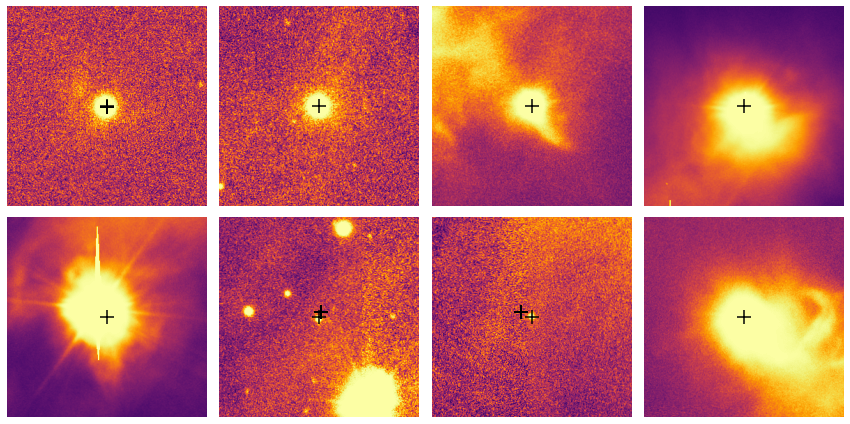

In [15]:
img, axs = plt.subplots(2,4, figsize=(12,6))
axs = axs.flatten()
plt.subplots_adjust(wspace=0,hspace=0)
for i, j in enumerate([1,2,3,5,6,8,11,14]):
    image  = getimage(selected.loc[j, 'index2'], 4)
    axs[i].imshow(image, cmap='inferno')
    #axs[i].set_title(j)
    axs[i].axis('off')
    
    #plot markers in the center
    axs[i].scatter(335/2,335/2, marker='+',s=200, color='black')
    axs[0].scatter(get_point(0, 9)[0], get_point(0,9)[1], marker='+',s=200, color='black')
    axs[5].scatter(get_point(5,13)[0], get_point(5,13)[1], marker='+',s=200, color='black')
    axs[6].scatter(get_point(6,12)[0], get_point(5,13)[1], marker='+',s=200, color='black')
    
    axs[i].set_xlim(24, 311)
    axs[i].set_ylim(24, 311)
plt.tight_layout()
plt.savefig('sample.pdf', dpi=500)

/tmp/ipykernel_35749/1767687902.py:8: RuntimeWarning: divide by zero encountered in log
  axs[i].imshow(np.log(image), vmin = np.log(np.percentile(image, minperc[i])), vmax=np.log(np.percentile(image, maxperc[i])),


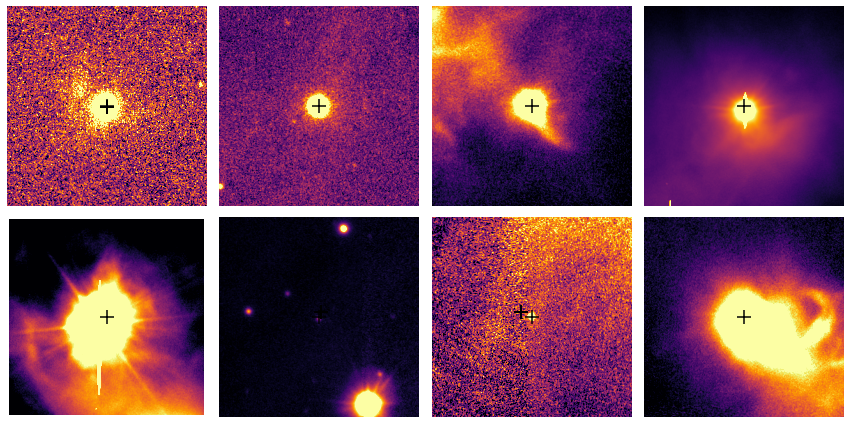

In [17]:
img, axs = plt.subplots(2,4, figsize=(12,6))
axs = axs.flatten()
plt.subplots_adjust(wspace=0, hspace=0)
minperc = [10, 5, 10, 5, 25,     10, 10, 10, 5, 5]
maxperc = [95, 99.2, 98, 99.2, 90,     99, 98, 90, 90, 99.2]
for i, j in enumerate([1,2,3,5,6,8,11,14]):
    image  = getimage_notrasf(selected.loc[j, 'index2'], 4)
    axs[i].imshow(np.log(image), vmin = np.log(np.percentile(image, minperc[i])), vmax=np.log(np.percentile(image, maxperc[i])), 
                  cmap='inferno')
    #axs[i].set_title(j)
    axs[i].axis('off')
    
    #plot markers in the center
    axs[i].scatter(335/2,335/2, marker='+',s=200, color='black')
    axs[0].scatter(get_point(0, 9)[0], get_point(0,9)[1], marker='+',s=200, color='black')
    axs[5].scatter(get_point(5,13)[0], get_point(5,13)[1], marker='+',s=200, color='black')
    axs[6].scatter(get_point(6,12)[0], get_point(5,13)[1], marker='+',s=200, color='black')
    
    if i != 4 and i!=8:
        axs[i].set_xlim(24, 311)
        axs[i].set_ylim(24, 311)
plt.tight_layout()
plt.savefig('sample_all_singularly_adjusted.png', dpi=500, bbox_inches='tight')

/tmp/ipykernel_22387/3968608703.py:5: RuntimeWarning: divide by zero encountered in log
  axs[0].imshow(np.log(image0), vmin=np.log(np.percentile(image0, 10)), vmax=np.log(np.percentile(image0, 95)), cmap='inferno')
/tmp/ipykernel_22387/3968608703.py:8: RuntimeWarning: divide by zero encountered in log
  axs[1].imshow(np.log(image1), vmin=np.log(np.percentile(image1, 10)), vmax=np.log(np.percentile(image1, 99)), cmap='inferno')
/tmp/ipykernel_22387/3968608703.py:12: RuntimeWarning: divide by zero encountered in log
  axs[2].imshow(np.log(image2), vmin=np.log(np.percentile(image2, 10)), vmax=np.log(np.percentile(image2, 98)), cmap='inferno')
/tmp/ipykernel_22387/3968608703.py:15: RuntimeWarning: divide by zero encountered in log
  axs[3].imshow(np.log(image3), vmin=np.log(np.percentile(image3, 5)), vmax=np.log(np.percentile(image3, 99.2)), cmap='inferno')
/tmp/ipykernel_22387/3968608703.py:18: RuntimeWarning: divide by zero encountered in log
  axs[4].imshow(np.log(image4), vmin=np.log(

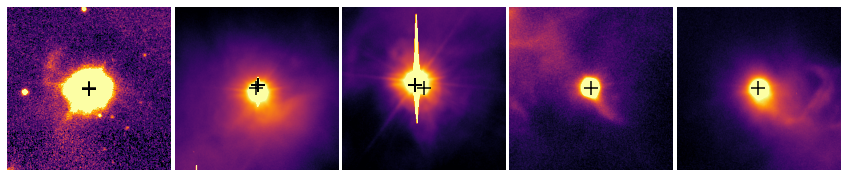

In [171]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
plt.subplots_adjust(wspace=0, hspace=0)

image0 = getimage_notrasf(selected.loc[0, 'index2'], 4)
axs[0].imshow(np.log(image0), vmin=np.log(np.percentile(image0, 10)), vmax=np.log(np.percentile(image0, 95)), cmap='inferno')

image1 = getimage_notrasf(selected.loc[5, 'index2'], 4)
axs[1].imshow(np.log(image1), vmin=np.log(np.percentile(image1, 10)), vmax=np.log(np.percentile(image1, 99)), cmap='inferno')

image2= getimage_notrasf(selected.loc[6, 'index2'], 4)
image2 = image2/image2.max()
axs[2].imshow(np.log(image2), vmin=np.log(np.percentile(image2, 10)), vmax=np.log(np.percentile(image2, 98)), cmap='inferno')

image3= getimage_notrasf(selected.loc[3, 'index2'], 4)
axs[3].imshow(np.log(image3), vmin=np.log(np.percentile(image3, 5)), vmax=np.log(np.percentile(image3, 99.2)), cmap='inferno')

image4= getimage_notrasf(selected.loc[14, 'index2'], 4)
axs[4].imshow(np.log(image4), vmin=np.log(np.percentile(image4, 5)), vmax=np.log(np.percentile(image4, 99.2)), cmap='inferno')

for i in range(5):
    axs[i].axis('off')
    axs[i].scatter(335/2,335/2, marker='+',s=200, color='black')
    axs[0].scatter(get_point(0, 9)[0], get_point(0,9)[1], marker='+',s=200, color='black')
    axs[1].scatter(get_point(5,13)[0], get_point(5,13)[1], marker='+',s=200, color='black')
    axs[2].scatter(get_point(6,12)[0], get_point(5,13)[1], marker='+',s=200, color='black')
    
    axs[i].set_xlim(24, 311)
    axs[i].set_ylim(24, 311)
plt.savefig('skimmed_sample_singularly_adjusted.png', dpi=500, bbox_inches='tight')

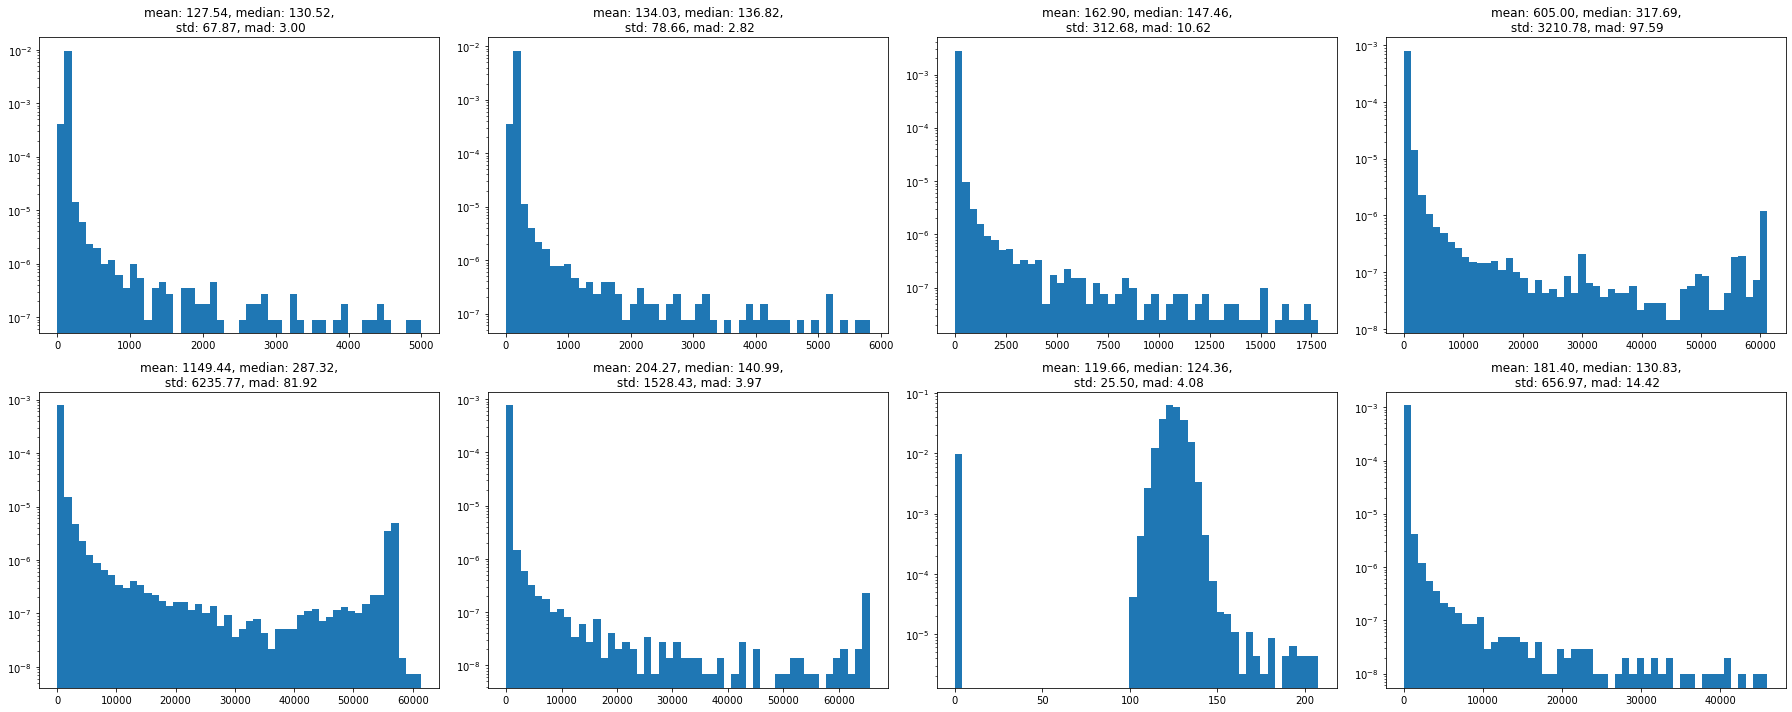

In [18]:
img, axs = plt.subplots(2,4, figsize=(25,10))
axs = axs.flatten()
plt.subplots_adjust(wspace=0, hspace=0)
for i, j in enumerate([1,2,3,5,6,8,11,14]):
    image  = getimage_notrasf(selected.loc[j, 'index2'], 4)
    axs[i].hist(image.flatten(), bins=50, density=True)
    #axs[i].set_title(j)
    x = np.linspace(0,1,100)
    axs[i].set_yscale('log')
    #axs[i].plot(x, transf(x,image.std(), image.mean())*100)
    axs[i].set_title(f'mean: {image.mean():.2f}, median: {np.median(image.flatten()):.2f},\n std: {image.std():.2f}, mad: {mad(image.flatten()):.2f}')
plt.tight_layout()
plt.savefig('distribution.png', dpi=500)

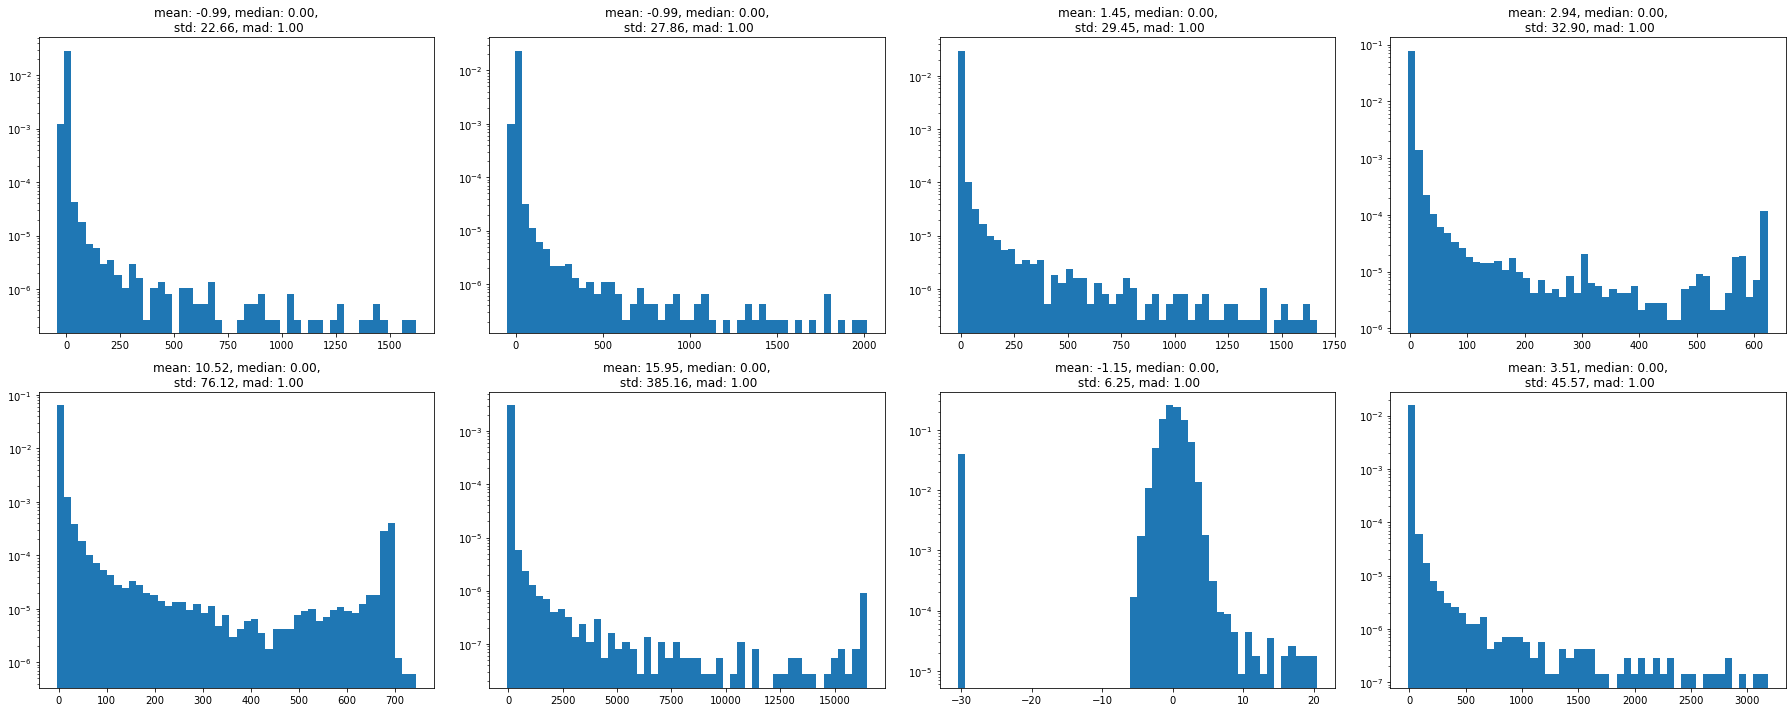

In [19]:
img, axs = plt.subplots(2,4, figsize=(25,10))
axs = axs.flatten()
plt.subplots_adjust(wspace=0, hspace=0)
for i, j in enumerate([1,2,3,5,6,8,11,14]):
    image  = getimage_notrasf(selected.loc[j, 'index2'], 4)
    image = (image-np.median(image.flatten()))/mad(image.flatten())
    axs[i].hist(image.flatten(), bins=50, density=True)
    #axs[i].set_title(j)
    
    axs[i].set_yscale('log')
    axs[i].set_title(f'mean: {image.mean():.2f}, median: {np.median(image.flatten()):.2f},\n std: {image.std():.2f}, mad: {mad(image.flatten()):.2f}')
plt.tight_layout()

# sigmoid used

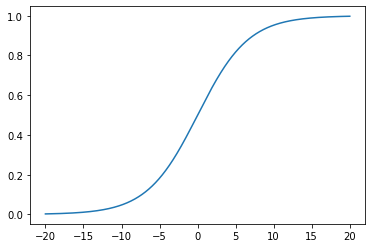

In [124]:
x = np.linspace(-20,20,10000)
plt.plot(x, 1/(1+np.exp(-0.3*x)))